In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [2]:
print(x_train[0].shape)

(28, 28)


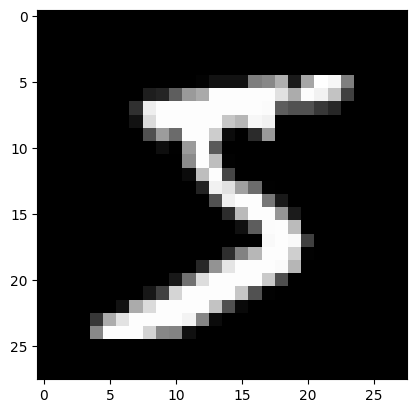

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()


In [4]:
import numpy as np
np.random.seed(0)
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train, x_val = x_train[indices[:int(0.8*len(x_train))]], x_train[indices[int(0.8*len(x_train)):]]
y_train, y_val = y_train[indices[:int(0.8*len(y_train))]], y_train[indices[int(0.8*len(y_train)):]]



In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
        Input, 
        Conv2D, 
        AveragePooling2D, 
        BatchNormalization,
        Flatten,
        Dense,
        Add
    )


def residual_block(input, f=3, filters=64):
    conv = Conv2D(filters, (f, f), padding='same')(input)
    conv = BatchNormalization()(conv)
    residual = Add()([input, conv])

    return residual


In [25]:
inputs = Input(shape=(28, 28, 1))
conv = Conv2D(32, (8, 8), padding='same')(inputs)
res1 = residual_block(conv,f=6,filters=32)
avg_pool = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(res1)
res2 = residual_block(avg_pool,f=4,filters=32)
avg_pool2 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(res2)
res3 = residual_block(avg_pool2,f=4,filters=32)
avg_pool3 = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))(res3)
flat = Flatten()(avg_pool3)
dense1 = Dense(60, activation='relu')(flat)
dense2 = Dense(10, activation='softmax')(dense1)
model = Model(inputs=inputs, outputs=dense2)
print(model.summary())


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 28, 28, 32)           2080      ['input_12[0][0]']            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 28, 28, 32)           36896     ['conv2d_23[0][0]']           
                                                                                                  
 batch_normalization_16 (Ba  (None, 28, 28, 32)           128       ['conv2d_24[0][0]']           
 tchNormalization)                                                                          

In [27]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_val, y_val))
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
print(f'Training Accuracy: {train_accuracy[-1]}')
print(f'Testing Accuracy: {test_accuracy[-1]}')




Epoch 1/2
1500/1500 [==============================] - 177s 117ms/step - loss: 0.4372 - accuracy: 0.8762 - val_loss: 0.3520 - val_accuracy: 0.9012
Epoch 2/2
1500/1500 [==============================] - 187s 124ms/step - loss: 0.2665 - accuracy: 0.9232 - val_loss: 0.2347 - val_accuracy: 0.9333
Training Accuracy: 0.9232291579246521
Testing Accuracy: 0.9333333373069763
